In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def read_data_file(filename):
    '''
    Read a data file and return a list of polygons.
    Returns:
        polygons = [polygon1, polygon2, polygon3, ...]
        polygon  = [[vertex1, vertex2, ...], [hinge1, hinge2, ...]]
        vertex   = [x, y]
        hinge    = [side_number, hinge_orientation, bending_angle]
    '''
    
    data = []
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()  
            if line and not line.startswith('#'):  
                numbers = [float(x) for x in line.split()]  
                data.append(numbers)
    
    polygons = []
    line = 0
    
    num_polygons = int(data[line][0])
    line += 1
    
    for i in range (num_polygons):
        num_vertices = int(data[line][0])
        num_hinges = int(data[line][1])
        line += 1
        
        vertices = []
        for j in range (num_vertices):
            vertices.append(data[line])
            line += 1
        
        hinges = []
        for j in range (num_hinges):
            hinges.append(data[line])
            line += 1
        
        polygons.append([vertices, hinges])
        
    return polygons

In [23]:
def draw_polygons(polygons):
    """
    Draw the origami pattern represented by the given polygons data.

    Args:
        polygons: from read_data_file
    """

    fig, ax = plt.subplots()
    ax.set_aspect('equal')

    min_x, min_y = float('inf'), float('inf')
    max_x, max_y = float('-inf'), float('-inf')
    for polygon in polygons:
        vertices = polygon[0]
        for x, y in vertices:
            min_x = min(min_x, x)
            min_y = min(min_y, y)
            max_x = max(max_x, x)
            max_y = max(max_y, y)

    ax.set_xlim(min_x - 1, max_x + 1)
    ax.set_ylim(min_y - 1, max_y + 1)

    marked_edges = set()  

    for polygon in polygons:
        vertices = polygon[0]
        highlight_edges = polygon[1]

        for i in range(len(vertices)):
            x1, y1 = vertices[i]
            x2, y2 = vertices[(i + 1) % len(vertices)]
            color = 'black'  
            edge_key = tuple(sorted(((x1, y1), (x2, y2))))  
            text_color = 'black' 

            for edge_info in highlight_edges:
                edge_index = int(edge_info[0]) - 1
                if i == edge_index:
                    color_code = int(edge_info[1])
                    if color_code == 1:
                        color = 'blue'
                    elif color_code == 0:
                        color = 'red'
                    
                    if edge_key not in marked_edges:  
                        value = edge_info[2]  

                        mid_x = (x1 + x2) / 2
                        mid_y = (y1 + y2) / 2

                        angle = np.degrees(np.arctan2(y2 - y1, x2 - x1)) - 90
                        if angle < 0:
                            angle += 360

                        ax.text(mid_x, mid_y, str(value), color=text_color, ha='center', va='center', rotation=angle, fontweight='bold')

                        marked_edges.add(edge_key)  
                        break  
            
            ax.plot([x1, x2], [y1, y2], color=color, linewidth=2)

    plt.title("Origami Pattern")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

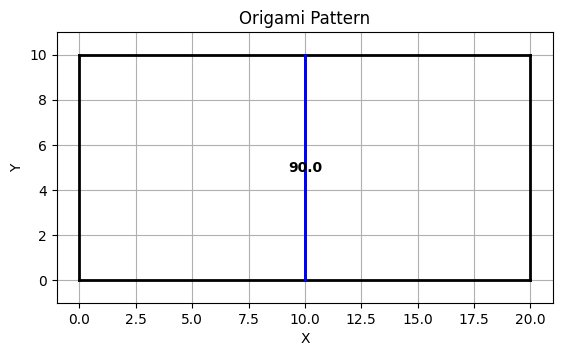

In [24]:
polygons = read_data_file('data_files/single_90.dat')
draw_polygons(polygons)

In [16]:
polygons

[[[[0.0, 0.0], [10.0, 0.0], [10.0, 10.0], [0.0, 10.0]], [[2.0, 1.0, 90.0]]],
 [[[10.0, 0.0], [20.0, 0.0], [20.0, 10.0], [10.0, 10.0]], [[4.0, 1.0, 90.0]]]]

In [ ]:
[[[0.0, 0.0], [10.0, 0.0], [10.0, 10.0], [0.0, 10.0]], [[2.0, 1.0, 90.0]]]